In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

#Filtro pasa altas

def yuyufaltas(ima1,FC1):
    cc1= cv2.cvtColor(ima1, cv2.COLOR_BGR2Lab)
    imal1=cc1[:,:,0]
    dimn1=imal1.shape
    dimn1=list(dimn1)
    fpb11=np.zeros((int(dimn1[0]),int(dimn1[1])))

    f11 = np.fft.fft2(imal1)
    FFT11 = np.fft.fftshift(f11)
    for x in range(dimn1[0]):
        for y in range(dimn1[1]):
            Dis1=((x-(dimn1[0]/2))**2)+((y-(dimn1[1]/2))**2)
            Dis1=math.sqrt(Dis1)
            if Dis1>=FC1:
                fpb11[x,y]=1


    mufb11=fpb11*FFT11

    imfb11= np.abs(np.fft.ifft2(np.fft.ifftshift(mufb11)))

    cc1[:,:,0]=imfb11
    imf1= cv2.cvtColor(cc1, cv2.COLOR_Lab2RGB)
    return imf1





C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


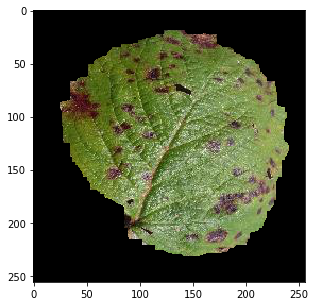

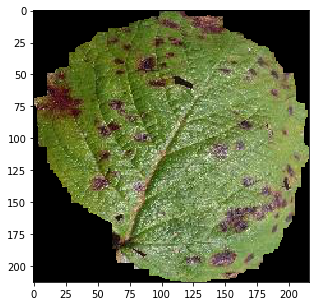

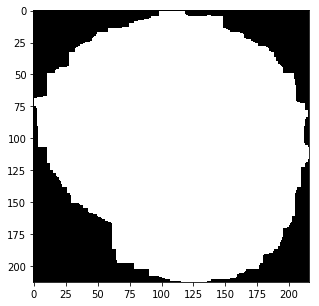

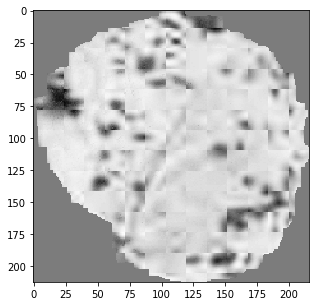

C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in multiply
C:\Users\Juancho\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in double_scalars


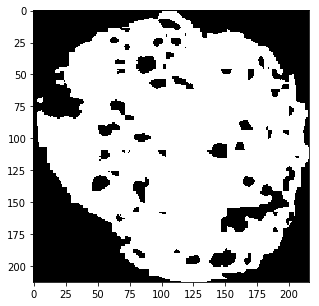

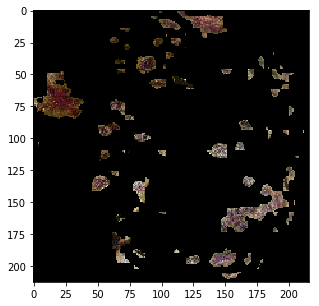

la severidad de la enfermedad es de :13.7 %


In [227]:
imb=cv2.imread('i1.jpg')
imb= cv2.cvtColor(imb, cv2.COLOR_RGB2BGR)

fa3=yuyufaltas(imb,400)#filtro FC=200
fa3= cv2.cvtColor(fa3, cv2.COLOR_BGR2GRAY)



hist = cv2.calcHist([fa3],[0],None,[255],[0,255])
histn=hist.ravel()/np.max(hist)
sumap=np.cumsum(histn)
pesos=np.arange(255)
umbral=-1
fn= np.inf
for i in range(255):
    p1,p2=np.hsplit(histn,[i])
    sumap1=sumap[i]
    sumap2=sumap[254]-sumap[i]
    w1,w2= np.hsplit(pesos,[i])
    
    med1=np.sum(w1*p1)/sumap1
    med2=np.sum(w2*p2)/sumap2
    
    var1=np.sum(((w1-med1)*(w1-med1))*p1)/sumap1
    var2=np.sum(((w2-med2)*(w2-med2))*p2)/sumap2
    
    fnmin= var1*sumap1 + var2*sumap2
    if fnmin < fn:
        fn = fnmin
        umbral = i

fa3[fa3<umbral]=0
fa3[fa3>=umbral]=255


kernel = np.ones((7,7),np.uint8)

erosionr = cv2.morphologyEx(fa3, cv2.MORPH_CLOSE, kernel)
erosionr = cv2.morphologyEx(erosionr, cv2.MORPH_CLOSE, kernel)
erosionr = cv2.erode(erosionr,kernel,iterations = 1)

erosionr=255-erosionr
erosionr=erosionr*(1/255)

imRES=erosionr.shape
imRES2=list(imRES)

for z in range((3)):
    imb[:,:,z]=(imb[:,:,z]*(1-erosionr))
plt.imshow(imb,'Greys')
plt.show()

ir1=erosionr.shape
ir=list(ir1)

for y in range(ir[1]):
    if np.min(erosionr[:,y])==1:
        if np.min(erosionr[:,y+1])==0:
            xi=y
            break
for y in range(ir[1]):
    if np.min(erosionr[:,y])==0:
        if np.min(erosionr[:,y+1])==1:
            xf=y
            break

#posición en yi y yf
for x in range(ir[0]):
    if np.min(erosionr[x,:])==1:
        if np.min(erosionr[x+1,:])==0:
            yi=x
            break
for x in range(ir[0]):
    if np.min(erosionr[x,:])==0:
        if np.min(erosionr[x+1,:])==1:
            yf=x
            break   

#print(xi)
#print(xf)

#print(yi)
#print(yf)


x=xf-xi
y=yf-yi
ROI=np.ones([x,y])
erosionr=erosionr[yi:yf,xi:xf]
ROI=imb[yi:yf,xi:xf]
plt.imshow(ROI)
plt.show()
plt.imshow(erosionr,'Greys')
plt.show()
LAB=cv2.cvtColor(ROI, cv2.COLOR_BGR2Lab)

C2=LAB[:,:,1]


plt.imshow(C2,'Greys')
plt.show()
ret, o2 = cv2.threshold(C2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


hist = cv2.calcHist([C2],[0],None,[255],[0,255])
histn=hist.ravel()/np.max(hist)
sumap=np.cumsum(histn)
pesos=np.arange(255)
umbral=-1
fn= np.inf
for i in range(255):
    p1,p2=np.hsplit(histn,[i])
    sumap1=sumap[i]
    sumap2=sumap[254]-sumap[i]
    w1,w2= np.hsplit(pesos,[i])
    
    med1=np.sum(w1*p1)/sumap1
    med2=np.sum(w2*p2)/sumap2
    
    var1=np.sum(((w1-med1)*(w1-med1))*p1)/sumap1
    var2=np.sum(((w2-med2)*(w2-med2))*p2)/sumap2
    
    fnmin= var1*sumap1 + var2*sumap2
    if fnmin < fn:
        fn = fnmin
        umbral = i

C2[C2<umbral]=0
C2[C2>=umbral]=255


o2=C2















o2=o2*(1/255)
plt.imshow(o2,'Greys')
plt.show()

for z in range((3)):
    ROI[:,:,z]=(ROI[:,:,z]*(o2))

plt.imshow(ROI,'Greys')
plt.show()

S=list(o2.shape)
sa=0
to=0
for x in range(S[0]):
    for y in range(S[1]):
        if o2[x,y]==0:
            sa=sa+1
        
        if erosionr[x,y]==0:
            to=to+1

#print(sa)
#print(to)

en=to-sa
seve=(en/to)*100
sevef=np.round(seve,1)
print ('la severidad de la enfermedad es de :' + str(sevef)+' %' )
